In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [56]:
# Load the Excel file
file_path = '/content/survey_answers.xlsx'
df = pd.read_excel(file_path)



In [57]:
df

,name_firm,work_consulting,job_title,time_current_firm,hours_per_week,gender,age,free_time,relation_stress_burnout,work_life_balance,...,salary_benefits_satisfaction,compensation_fairness,financial_inventives,retention_factor_1,retention_factor_2,retention_factor_3,retention_factor_4,retention_factor_5,retention_factor_6,retention_factor_7
0,EY,4 - 6 years,Senior Consultant,1 - 3 years,41 - 50,Female,25 - 34,Often,Sometimes,3,...,5,3,5,Work-life balance,Work-life balance,Compensation and rewards,Work-life balance,Organizational culture and fit,Burnout and stress management,Work-life balance
1,Deloitte,1 - 3 years,Analyst,1 - 3 years,41 - 50,Male,25 - 34,Rarely,Often,4,...,5,5,5,Career development and progression,Career development and progression,Job satisfaction and enjoyment,Career development and progression,Compensation and rewards,Burnout and stress management,Organizational culture and fit
2,Ekimetrics,1 - 3 years,Junior Consultant,1 - 3 years,41 - 50,Male,25 - 34,Rarely,Often,3,...,1,3,4,Job satisfaction and enjoyment,Organizational culture and fit,Burnout and stress management,Work-life balance,Job satisfaction and enjoyment,Organizational culture and fit,Organizational culture and fit
3,Deepia,1 - 3 years,Junior Consultant,1 - 3 years,35 - 40,Male,25 - 34,Sometimes,Occasionally,3,...,3,3,5,Management proximity and support,Work-life balance,Compensation and rewards,Job satisfaction and enjoyment,Management proximity and support,Compensation and rewards,Organizational culture and fit
4,Deepia,< 1 year,Intern,1 year or less,35 - 40,Female,25 - 34,Rarely,Occasionally,4,...,2,1,3,Management proximity and support,Management proximity and support,Compensation and rewards,Job satisfaction and enjoyment,Management proximity and support,Work-life balance,Work-life balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,IBM Consulting,4 - 6 years,Senior Consultant,4 - 6 years,41 - 50,Female,35 - 44,Sometimes,Sometimes,5,...,4,3,1,Burnout and stress management,Organizational culture and fit,Career development and progression,Organizational culture and fit,Job satisfaction and enjoyment,Management proximity and support,Work-life balance
496,Deloitte,10+ years,Partner,4 - 6 years,51 - 60,Female,35 - 44,Often,Often,4,...,2,2,3,Management proximity and support,Compensation and rewards,Burnout and stress management,Career development and progression,Compensation and rewards,Management proximity and support,Burnout and stress management
497,Deepia,< 1 year,Intern,1 year or less,41 - 50,Female,< 25,Often,Often,5,...,4,2,2,Burnout and stress management,Job satisfaction and enjoyment,Work-life balance,Organizational culture and fit,Career development and progression,Work-life balance,Management proximity and support
498,Capgemini,10+ years,Director,1 - 3 years,41 - 50,Female,35 - 44,Often,Often,4,...,5,4,4,Work-life balance,Work-life balance,Career development and progression,Compensation and rewards,Career development and progression,Career development and progression,Management proximity and support


In [58]:
#hours per week in average focusing one company

capgemini_employees = df[df['name_firm'] == 'Capgemini']

# Compute the average of the 'hours_per_week' for Capgemini employees
# First, clean the 'hours_per_week' column as it's categorical
# Mapping hours ranges to average values
hours_map = {
    '< 35': 35,
    '35 - 40': 37.5,
    '41 - 50': 45,
    '51 - 60': 55,
    '61 - 70': 65,
    '> 70': 75
}
capgemini_employees['average_hours_per_week'] = capgemini_employees['hours_per_week'].map(hours_map)
average_hours = capgemini_employees['average_hours_per_week'].mean()

print(f"The average weekly hours for Capgemini employees is: {average_hours}")


The average weekly hours for Capgemini employees is: 44.53125


<ipython-input-58-07bc8041fd8c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capgemini_employees['average_hours_per_week'] = capgemini_employees['hours_per_week'].map(hours_map)


In [59]:
# Extracting the relevant columns for analysis
columns_of_interest = [
    'work_life_balance',
    'job_fulfilling', 'enjoy_work', 'fit_value', 'team_firm_fit',
    'leadership_satisfaction', 'recognition_at_work', 'management_proximity',
    'career_development_satisfaction', 'promotion_path_clarity', 'training_and_development',
    'limited_progression', 'salary_benefits_satisfaction', 'compensation_fairness',
    'financial_inventives'
]

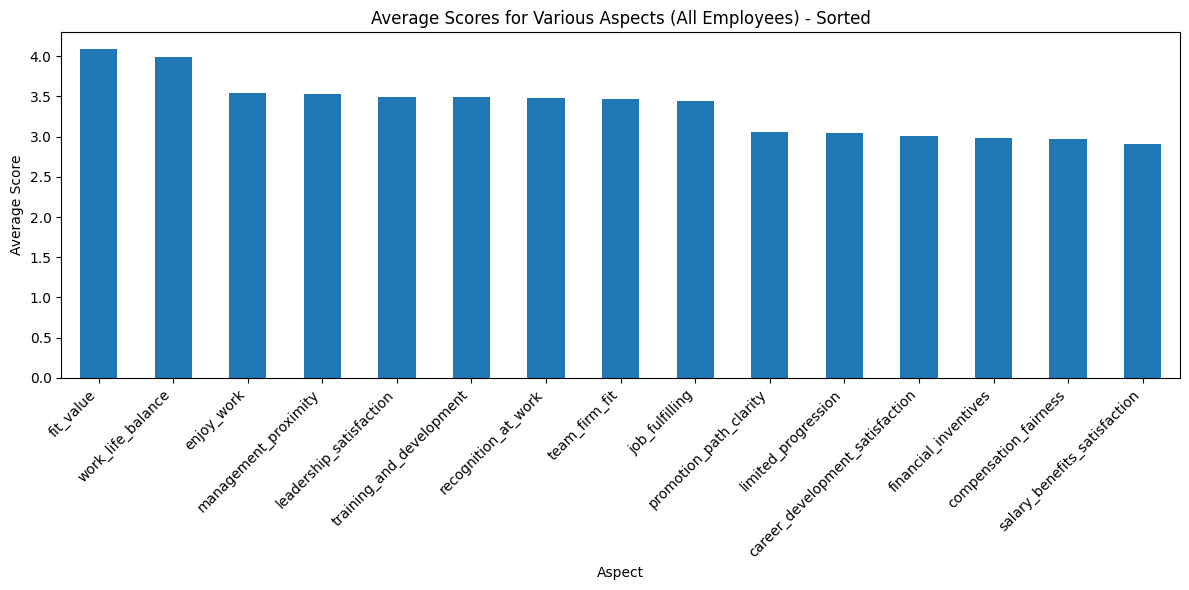

In [60]:
# Calculate the average scores for all employees (no filter on Capgemini)
avg_scores_all_employees = df[columns_of_interest].mean()

# Sort the average scores in descending order
avg_scores_sorted_all = avg_scores_all_employees.sort_values(ascending=False)

# Plotting the sorted averages for all employees
plt.figure(figsize=(12, 6))
avg_scores_sorted_all.plot(kind='bar')
plt.title('Average Scores for Various Aspects (All Employees) - Sorted')
plt.xlabel('Aspect')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

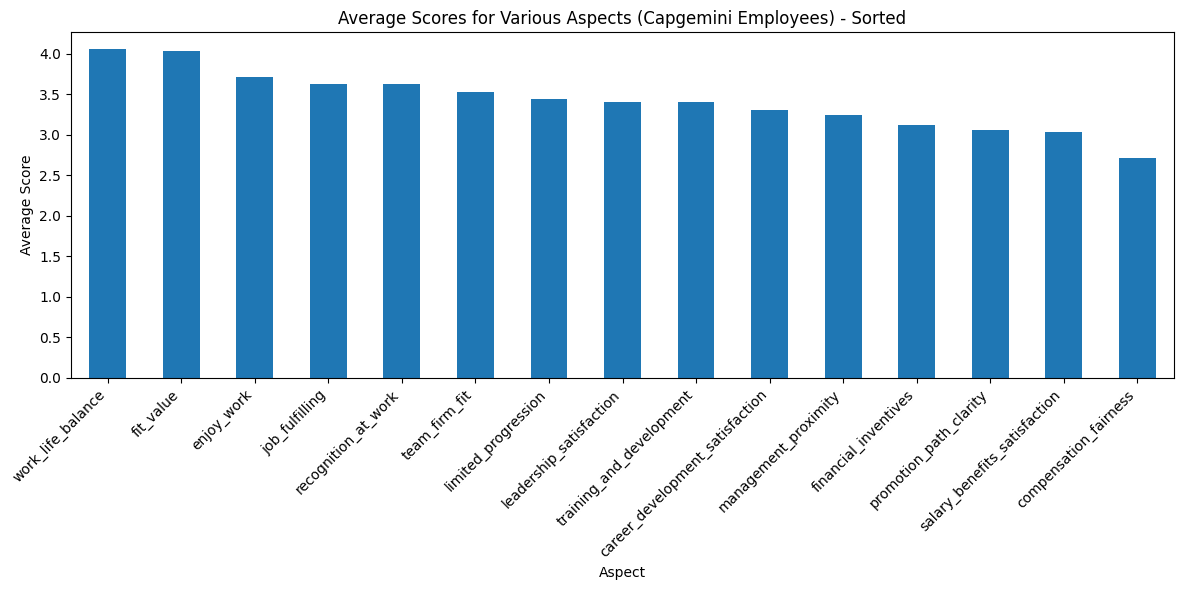

In [61]:
# Filtering for Capgemini employees and computing the average for each of these columns
capgemini_avg_scores = capgemini_employees[columns_of_interest].mean()
# Sorting the average scores in descending order
capgemini_avg_scores_sorted = capgemini_avg_scores.sort_values(ascending=False)

# Plotting the sorted averages
plt.figure(figsize=(12, 6))
capgemini_avg_scores_sorted.plot(kind='bar')
plt.title('Average Scores for Various Aspects (Capgemini Employees) - Sorted')
plt.xlabel('Aspect')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




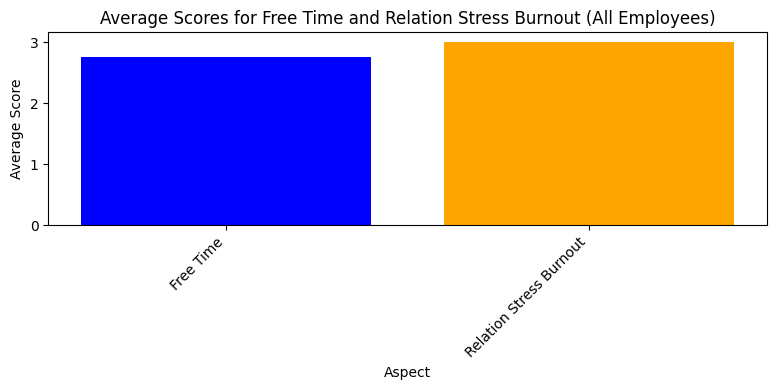

In [62]:


# Define the mapping for categorical values
categorical_map = {
    'Rarely': 1,
    'Occasionally': 2,
    'Sometimes': 3,
    'Often': 4,
    'Always': 5
}


# Apply the mapping for 'free_time' and 'relation_stress_burnout' across all employees
df['free_time'] = df['free_time'].map(categorical_map)
df['relation_stress_burnout'] = df['relation_stress_burnout'].map(categorical_map)

# Calculate the average scores for these aspects
avg_free_time_all = df['free_time'].mean()
avg_relation_stress_all = df['relation_stress_burnout'].mean()

# Plotting the averages for all employees
plt.figure(figsize=(8, 4))
plt.bar(['Free Time', 'Relation Stress Burnout'], [avg_free_time_all, avg_relation_stress_all], color=['blue', 'orange'])
plt.title('Average Scores for Free Time and Relation Stress Burnout (All Employees)')
plt.xlabel('Aspect')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Set labels to diagonal
plt.tight_layout()
plt.show()

<ipython-input-63-71c553a2234f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capgemini_employees['free_time'] = capgemini_employees['free_time'].map(categorical_map)
<ipython-input-63-71c553a2234f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capgemini_employees['relation_stress_burnout'] = capgemini_employees['relation_stress_burnout'].map(categorical_map)


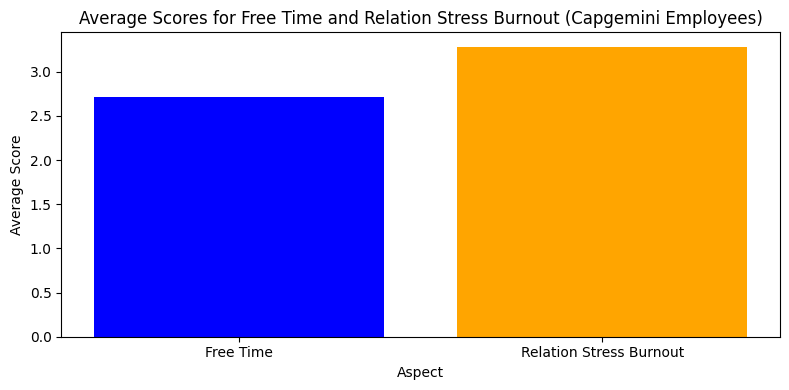

In [63]:

# Apply the mapping to the specific columns
capgemini_employees['free_time'] = capgemini_employees['free_time'].map(categorical_map)
capgemini_employees['relation_stress_burnout'] = capgemini_employees['relation_stress_burnout'].map(categorical_map)

# Calculate the average for 'free_time' and 'relation_stress_burnout'
avg_free_time = capgemini_employees['free_time'].mean()
avg_relation_stress = capgemini_employees['relation_stress_burnout'].mean()

# Plotting the averages
plt.figure(figsize=(8, 4))
plt.bar(['Free Time', 'Relation Stress Burnout'], [avg_free_time, avg_relation_stress], color=['blue', 'orange'])
plt.title('Average Scores for Free Time and Relation Stress Burnout (Capgemini Employees)')
plt.xlabel('Aspect')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [64]:
# List of retention factor columns in the order of priority from highest to lowest
retention_factors_columns = [
    'retention_factor_1', 'retention_factor_2', 'retention_factor_3',
    'retention_factor_4', 'retention_factor_5', 'retention_factor_6',
    'retention_factor_7'
]

# Count the values in each retention factor column
retention_counts = {}
for col in retention_factors_columns:
    counts = capgemini_employees[col].value_counts()
    retention_counts[col] = counts

# Finding the max count for each column
max_retention_factors = {col: counts.idxmax() for col, counts in retention_counts.items()}

max_retention_factors


{'retention_factor_1': 'Burnout and stress management',
 'retention_factor_2': 'Work-life balance',
 'retention_factor_3': 'Burnout and stress management',
 'retention_factor_4': 'Compensation and rewards',
 'retention_factor_5': 'Work-life balance',
 'retention_factor_6': 'Management proximity and support',
 'retention_factor_7': 'Management proximity and support'}

In [65]:
# List of retention factor columns in the order of priority from highest to lowest
retention_factors_columns = [
    'retention_factor_1', 'retention_factor_2', 'retention_factor_3',
    'retention_factor_4', 'retention_factor_5', 'retention_factor_6',
    'retention_factor_7'
]

# Count the values in each retention factor column specifically for Capgemini employees
retention_counts_capgemini = {}
for col in retention_factors_columns:
    counts = capgemini_employees[col].value_counts()
    retention_counts_capgemini[col] = counts

# Finding the most mentioned retention factor in each column
max_retention_factors_capgemini = {col: counts.idxmax() for col, counts in retention_counts_capgemini.items()}

# Display the results
max_retention_factors_capgemini


{'retention_factor_1': 'Burnout and stress management',
 'retention_factor_2': 'Work-life balance',
 'retention_factor_3': 'Burnout and stress management',
 'retention_factor_4': 'Compensation and rewards',
 'retention_factor_5': 'Work-life balance',
 'retention_factor_6': 'Management proximity and support',
 'retention_factor_7': 'Management proximity and support'}